In [1]:
# dependencies
import sys
import os
import pathlib
import numpy as np
import pandas as pd

notebook_dir = os.getcwd()
project_root = None
for parent in [os.path.join(notebook_dir, os.pardir) for _ in range(5)]:
    if 'src' in os.listdir(parent):
        project_root = parent
        break
if project_root and project_root not in sys.path:
    sys.path.insert(0, project_root)
    print(f"Added {project_root} to sys.path")

# user lib
from src.utilities.vizualization import *
from src.utilities.utilities import test_make_dir

Added /Users/oliverslott/Documents/MasterThesis/mt_code/notebooks/.. to sys.path


In [2]:
latex_path = pathlib.Path(os.getcwd()).parent.parent / 'mt_latex/images'

# Chapter: Data & Methodology

In [3]:
chapter = 'data_methodology'
latex_path_chapter = test_make_dir(latex_path/chapter)

In [4]:
freq = 'M'
dfs = {}
for i in pathlib.Path('../data/raw/plot_data').iterdir():
     if i.is_file() and '_M_' in i.name:
        dfs[i.name.split('.')[0].split('_')[-1].lower()] = pd.read_parquet(i)

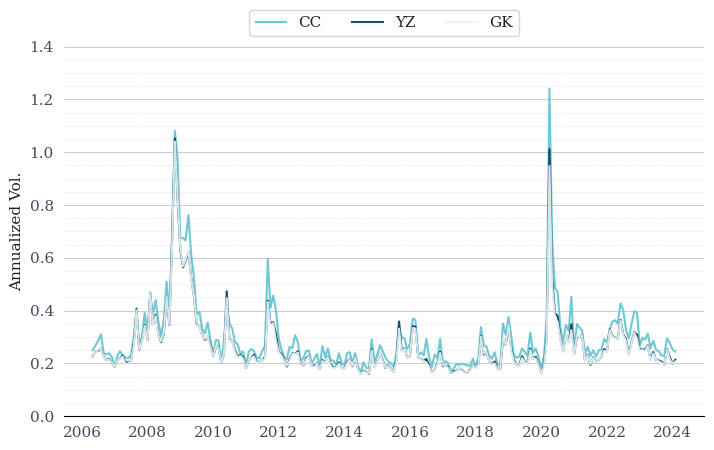

In [5]:
# create vol diff plot
df_vol_diff = pd.concat([dfs[i]['HV'].mean(axis=1).rename(i.upper()) for i in ('cc', 'gk', 'yz')], axis=1)
y_vals = df_vol_diff.columns.to_list()
y_vals[1], y_vals[2] = y_vals[2], y_vals[1]
fig = lineplot(df_vol_diff, y=y_vals, interval=1.4, ylabel='Annualized Vol.')
save_fig(
    fig, 
    latex_path_chapter, 
    title='Comparing One-Month Annualized Volatility: Close-to-Close vs. Garman-Klass vs. Yang-Zhang',
    note='Note: The curves represents cross-sectional average of RV across stocks and days'
)

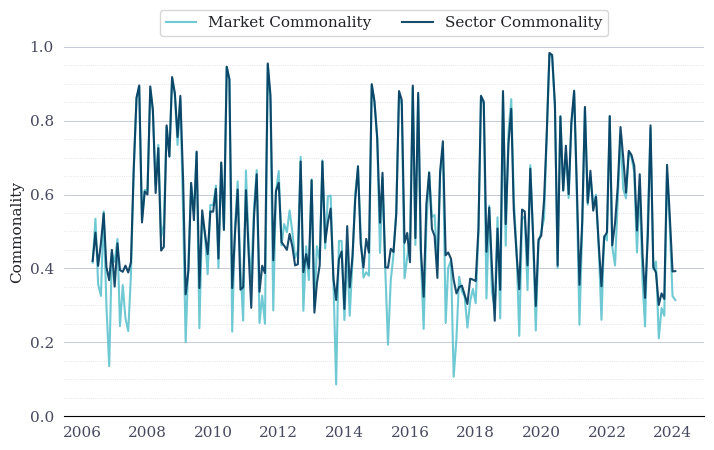

In [6]:
# create sector commonality
df_commonality = pd.concat([dfs['yz'][i].mean(axis=1).rename(i) for i in ('Market Commonality', 'Sector Commonality')], axis=1)
y_vals = df_commonality.columns.to_list()
fig = lineplot(df_commonality, y=y_vals, interval=1, ylabel='Commonality')
save_fig(
    fig, 
    latex_path_chapter, 
    title='Comparing One-Month Market Commonality vs. Sector Commonality',
    note='Note: The curves represents cross-sectional average of R2 across stocks and days'
)

min, max = 0.18832829305199925, 0.30902483349909177


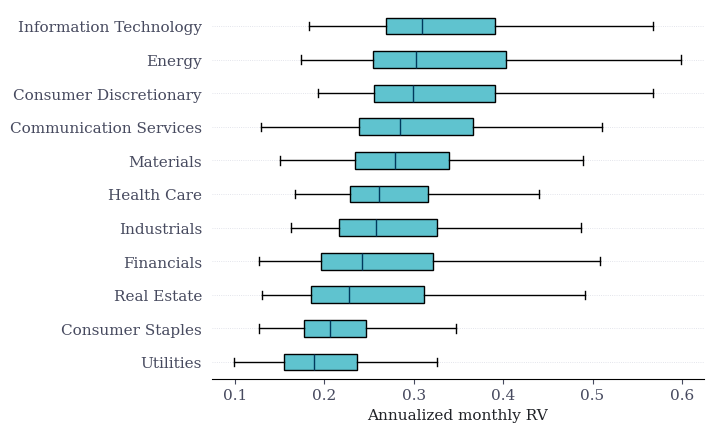

In [7]:
# create box plot
df_boxplot = dfs['cc'][['HV', 'GICS Sector', 'Equity Type']]
sectors = df_boxplot['GICS Sector'].iloc[0].unique()
s_stock = (df_boxplot.xs('Equity Type', level=0, axis=1) == 'Stock').any()
s_stock = set(s_stock[s_stock == True].index.tolist())

boxplot_dict = {}
for i in sectors:
    s_sector = (df_boxplot.xs('GICS Sector', level=0, axis=1) == i).any()
    s_sector = set(s_sector[s_sector == True].index.tolist())
    tickers = s_sector & s_stock
    boxplot_dict[i] = df_boxplot['HV'][list(tickers)].mean(axis=1).values

print(f"min, max = {', '.join(map(str, np.sort([np.median(v) for _, v in boxplot_dict.items()])[[0, -1]]))}")
boxplot_dict = dict(sorted(boxplot_dict.items(), key=lambda item: np.median(item[1])))
fig = boxplot(boxplot_dict, xlabel='Annualized monthly RV', vert=False)
save_fig(
    fig,
    latex_path_chapter,
    title='Distribution of Annualized Monthly RV By Industry',
    note='Note: The calculations are based on cross-sectional average of RV across sectoral stocks and days.'\
        + ' The boxplots are sorted in descending order according to the median values'
)
